<a href="https://colab.research.google.com/github/PaolaMaribel18/RI_2024a/blob/main/week14/introCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification using Convolutional Neural Networks (CNNs)
##Objective:
The objective of this exercise is to provide students with hands-on experience in building, training, and evaluating a Convolutional Neural Network (CNN) for image classification using the Caltech101 dataset. Students will learn the principles of CNNs, including convolutional layers, pooling layers, and fully connected layers, as well as techniques for data augmentation and model evaluation.

##Dataset:
Caltech101: This dataset contains 101 categories of objects, with approximately 40 to 800 images per category. The images are of various sizes, but most are medium resolution.

In [ ]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools

##Dataset Preparation:
Download the Caltech101 dataset and organize it into training and testing sets.
Apply data preprocessing techniques such as resizing images to a consistent size, normalizing pixel values, and data augmentation (rotation, scaling, flipping, etc.).

In [ ]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101:3.0.2',  # usar version 1.0.3
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)


##Data loading:
tfds.load: This function loads the specified dataset. Here, it's loading the 'caltech101' dataset with version '3.0.1'.

split=['train[:80%]','train[:20%]']: The dataset is split into two parts: 80% for training and 20% for testing.

with_info=True: This flag indicates that additional metadata about the dataset should be returned, such as the number of classes.

as_supervised=True: This ensures that the data is returned as a tuple (image, label) rather than a dictionary. This format is typical for supervised learning tasks.

download=False: This prevents the code from downloading the dataset if it is not already available locally.

In [ ]:
num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

In [ ]:
labels=dataset_info.features['label'].names
print (labels)

['accordion', 'airplanes', 'anchor', 'ant', 'background_google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'faces', 'faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

##Data preprocessing:
tf.image.resize(image, (224, 224)): Resizes each image to 224x224 pixels. This is a common size for CNN inputs, such as those used in models like VGG and ResNet.

tf.cast(image, tf.float32) / 255.0: Converts the pixel values to float32 and normalizes them to the range [0, 1]. This normalization helps improve the convergence of neural networks during training.

2. Build the CNN Model:
Define a CNN model with the following architecture:
* Convolutional Layer 1: 32 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 1: Pooling size (2x2).
* Convolutional Layer 2: 64 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 2: Pooling size (2x2).
* Flatten the feature maps.
* Fully Connected Layer 1: 128 units, ReLU activation.
* Output Layer: Number of units equal to the number of classes in the Caltech-101 dataset.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Modelos adicionales

Model v1

In [ ]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


Modelv2

In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])



####Model 3

In [ ]:
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])



####Model 4

In [ ]:
model4 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


####Model 5

In [ ]:
model5 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])


####Model 6

In [ ]:
model6 = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])


## Continuacion


##Model compilation:
optimizer='adam': The Adam (Adaptive Moment Estimation) optimizer is used to adjust the model's weights during training. Adam is a popular choice because it combines the advantages of two other extensions of stochastic gradient descent: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). It adapts the learning rate for each parameter, making the optimization process more efficient and potentially leading to faster convergence.

loss='sparse_categorical_crossentropy': This loss function is used for multi-class classification problems where the target labels are integers. In this case, the labels are provided as integers (e.g., 0, 1, 2, ...) rather than one-hot encoded vectors. The sparse categorical crossentropy computes the cross-entropy loss between the true labels and the predicted probabilities, which is suitable for multi-class classification tasks.

metrics=['accuracy']: This specifies that accuracy will be tracked during training and evaluation. Accuracy is a common metric for classification tasks, representing the proportion of correctly predicted samples.

3. Training the Model:
* Compile the model with an appropriate optimizer and loss function.
* Train the model using the training dataset and validate it using the testing dataset.
* Observe the training process, including the loss and accuracy metrics.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.0150 - loss: 4.9022 - val_accuracy: 0.0474 - val_loss: 4.4486
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.0657 - loss: 4.3381 - val_accuracy: 0.0980 - val_loss: 4.2445
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.2865 - loss: 3.2225 - val_accuracy: 0.1471 - val_loss: 4.1183
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.7004 - loss: 1.3680 - val_accuracy: 0.1912 - val_loss: 4.6302
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9446 - loss: 0.3454 - val_accuracy: 0.1961 - val_loss: 6.6366
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9839 - loss: 0.0849 - val_accuracy: 0.1863 - val_loss: 6.6993
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.9944 - loss: 0.0330 - val_accuracy: 0.1748 - val_loss: 7.1645
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9985 - loss: 0.0122 - val_accuracy: 0.1879 - v

## Modelos Adicionales

######Model 1

In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(train_dataset, epochs=10, validation_data=test_dataset)

#####Model 2

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_dataset, epochs=10, validation_data=test_dataset)

In [ ]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_dataset, epochs=10, validation_data=test_dataset)

In [ ]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_dataset, epochs=50, validation_data=test_dataset)

In [ ]:
learning_rate = 0.01
batch_size = 256
epochs = 15

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_dataset, epochs=epochs, batch_size=batch_size, validation_data=test_dataset)


#####Model 3

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(train_dataset, epochs=10, validation_data=test_dataset)

#####Model 4

In [ ]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.fit(train_dataset, epochs=10, validation_data=test_dataset)

In [ ]:
model4.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.fit(train_dataset, epochs=10, validation_data=test_dataset)

## Continuacion


4. Understanding Parameter Sharing and Local Receptive Fields:
* Analyze the number of learnable parameters in each layer of the CNN model.

¿What is parameter sharing? ¿What's its role in reducing the model's complexity?

In [ ]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 23920550


5. Evaluation and Interpretation:
* Evaluate the model's performance on the testing dataset and calculate the accuracy.
* Visualize some misclassified images and discuss the possible reasons for misclassifications.

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 793ms/step - accuracy: 0.2043 - loss: 8.0205
Accuracy on the test set: 19.12%


## Modelos adicionales


In [ ]:
loss, accuracy = model1.evaluate(test_dataset)
print(f"Accuracy model 1 on the test set: {accuracy * 100:.2f}%")

In [ ]:
loss, accuracy = model2.evaluate(test_dataset)
print(f"Accuracy model 2 on the test set: {accuracy * 100:.2f}%")

In [ ]:
loss, accuracy = model3.evaluate(test_dataset)
print(f"Accuracy model 3 on the test set: {accuracy * 100:.2f}%")

In [ ]:
loss, accuracy = model4.evaluate(test_dataset)
print(f"Accuracy model 4 on the test set: {accuracy * 100:.2f}%")

Entre estos modelos, el Modelo 4 logró la mayor precisión en el conjunto de prueba, alcanzando un 27.94%. Sin embargo, todos los modelos enfrentaron desafíos para obtener una precisión alta en este conjunto de datos, lo que sugiere que podría requerirse un ajuste más exhaustivo de hiperparámetros, así como posibles mejoras en la arquitectura y el preprocesamiento de los datos para lograr un mejor rendimiento.

## Continuacion


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


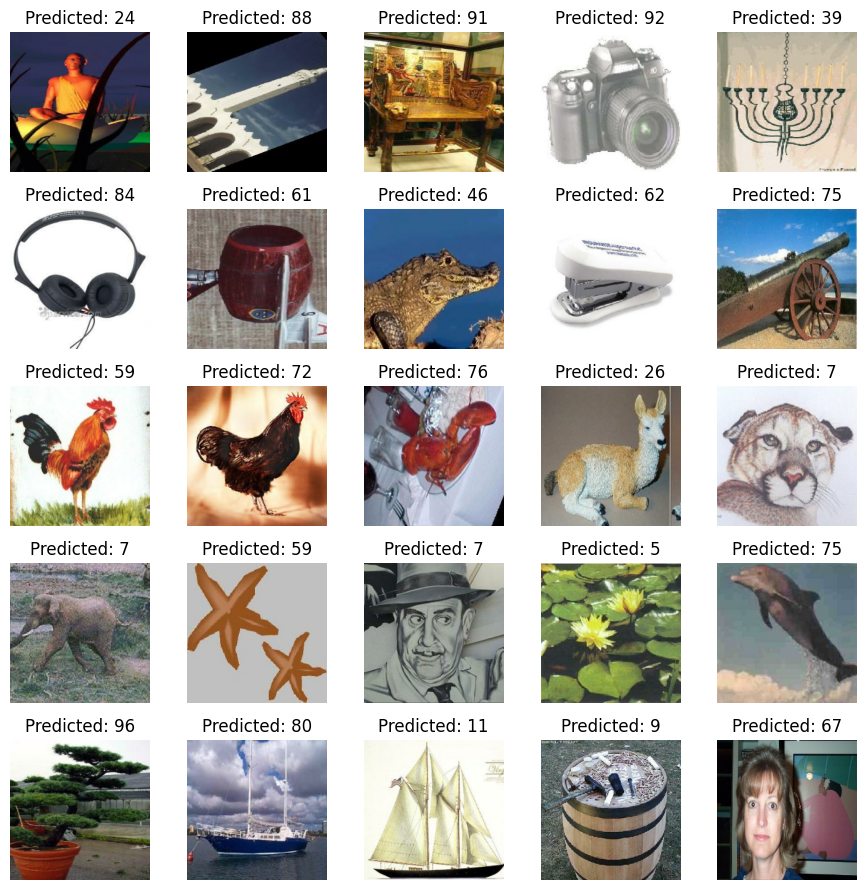

In [ ]:
misclassified_images = []
misclassified_labels = []

for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

max_display = 25
misclassified_images = misclassified_images[:max_display]
misclassified_labels = misclassified_labels[:max_display]

plt.figure(figsize=(9, 9))
for i in range(len(misclassified_images)):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


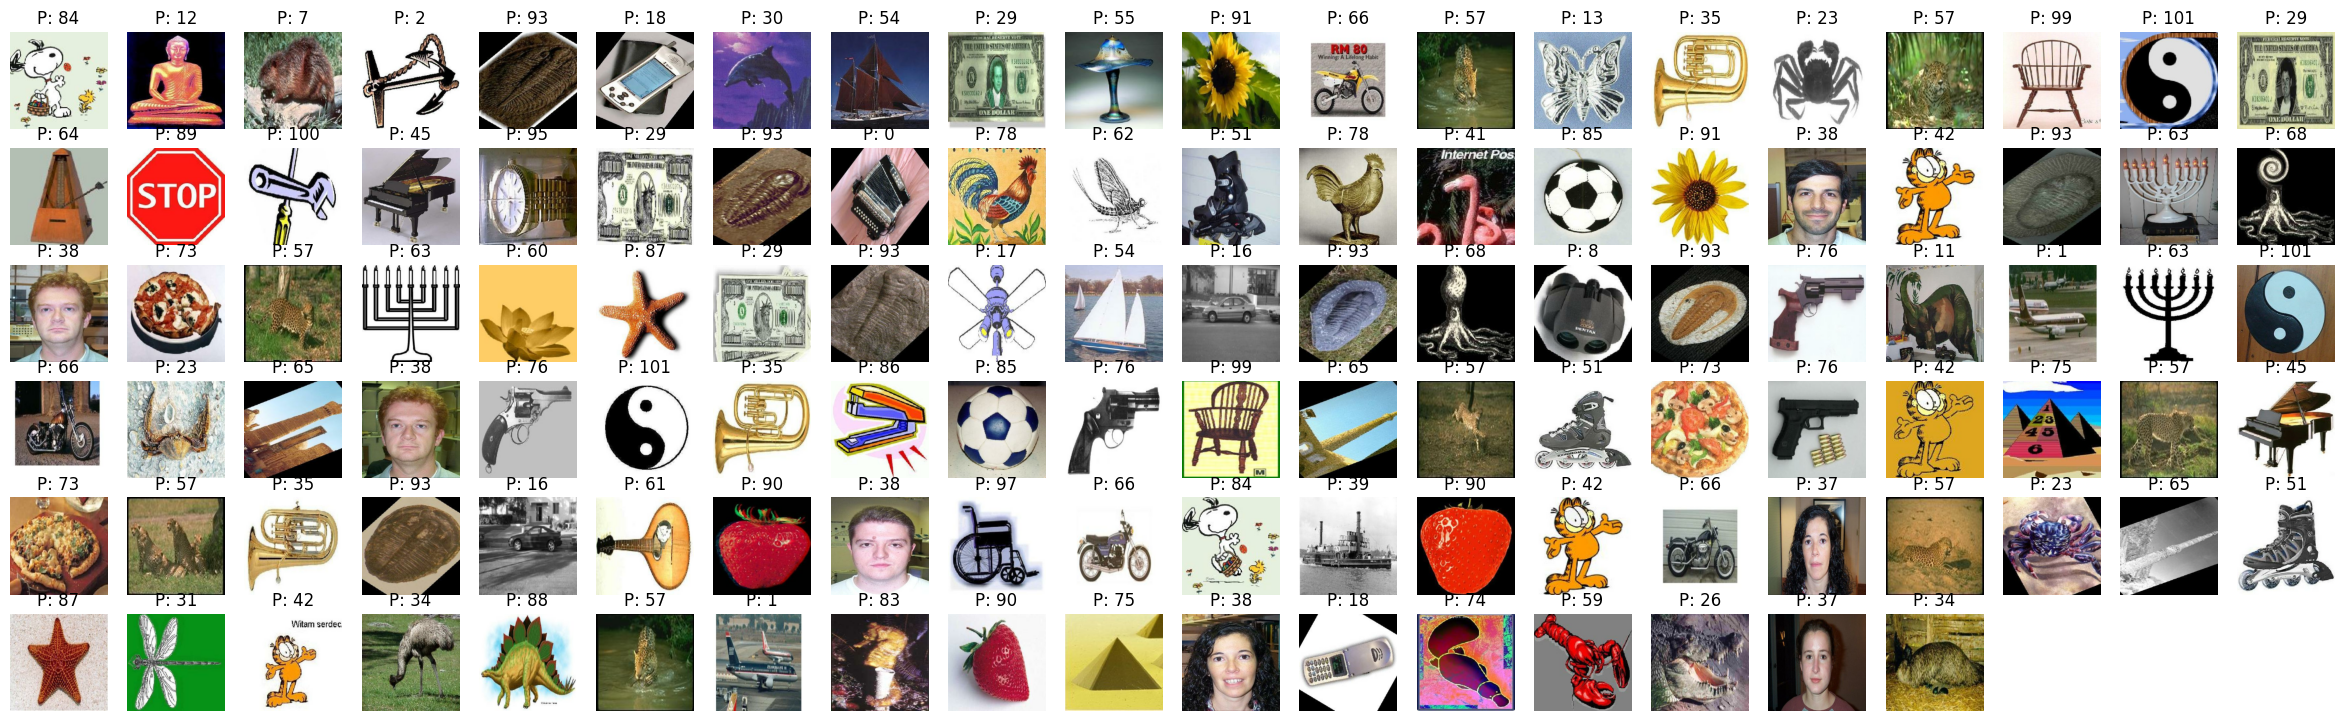

In [ ]:
niceclassified_images = []
niceclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    niceclassified_idx = np.where(predicted_label == label.numpy())[0]
    for idx in niceclassified_idx:
        niceclassified_images.append(image[idx])
        niceclassified_labels.append(predicted_label[idx])

plt.figure(figsize=(30, 30))
for i in range(len(niceclassified_images)):
    plt.subplot(20, 20, i+1)
    plt.imshow(niceclassified_images[i])
    plt.title(f"P: {niceclassified_labels[i]}")
    plt.axis('off')
plt.show()

6. Pick a sample image and show the feature maps activated by the convolutional layers

In [ ]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(sample_image)

plt.figure(figsize=(12, 6))
for i, activation in enumerate(activations[:8]):
    plt.subplot(2, 4, i+1)
    try:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
    except:
        pass
    plt.title(f"Activation {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


ValueError: The layer sequential has never been called and thus has no defined input.